In [1]:
%matplotlib inline
from inc.notebook004 import *

# Predicting when data does not fit the memory

In [2]:
predict_memory()

Results for profiling set: 810 cases fit in the memory, 10 do not, 0 prediction errors.
Results for target set: 300 cases fit in the memory, 40 do not, 0 prediction errors.


# Data summary

In [3]:
get_summary()

mean (sec)  available  outliers  \
application set       input       workers                                    
hbkmeans    profiling 32000       1             18.97         10         0   
                                  2             17.72          8         2   
                                  3             17.32          8         2   
                                  4             18.88         10         0   
                                  5             19.90          9         1   
                                  6             20.97         10         0   
                                  7             21.90         10         0   
                                  8             23.26          9         1   
                      64000       1             19.08         10         0   
                                  2             18.60         10         0   
                                  3             17.92         10         0   
                                  4             19.13         10         0   
                                  5             20.41         10         0   
                                  6             21.32         10         0   
                                  7             21.78         10         0   
                                  8             22.56         10         0   
                      128000      1             20.51         10         0   
                                  2             19.37         10         0   
                                  3             18.60         10         0   
                                  4             19.71         10         0   
                                  5             21.00         10         0   
                                  6             21.29         10         0   
                                  7             22.50         10         0   
                                  8             22.42         10         0   
                      256000      1             22.83         10         0   
                                  2             21.02         10         0   
                                  3             19.50         10         0   
                                  4             20.57         10         0   
                                  5             21.58         10         0   
                                  6             22.76          8         2   
                                  7             23.64         10         0   
                                  8             24.39         10         0   
                      512000      1             27.80         10         0   
                                  2             24.19         10         0   
                                  3             21.51         10         0   
                                  4             22.68         10         0   
                                  5             23.90          9         1   
                                  6             24.85         10         0   
                                  7             25.54         10         0   
                                  8             25.99         10         0   
                      1024000     1             36.55         10         0   
                                  2             30.13         10         0   
                                  3             24.90         10         0   
                                  4             26.01         10         0   
                                  5             27.64          9         1   
                                  6             28.37         10         0   
                                  7             28.60         10         0   
                                  8             29.54          9         1   
                      2048000     1             52.56         10         0   
                                  2             40.73         10 

# Tasks and HDFS Blocks

In [4]:
tasks_blocks()

count
Application Size (MB) 1st-Stage Tasks HDFS Blocks       
hbkmeans    6.13      5               1               80
            12.26     5               1               80
            24.51     5               1               80
            49.03     5               1               80
            98.06     5               1               80
            196.11    5               2               80
            392.22    5               4               80
            784.45    10              7               80
            3137.82   25              25              50
            12551.30  100             99              50
hbsort      262.80    2               3               20
            525.60    5               5               30
            1051.18   9               9               40
            2102.38   17              17              30
            3132.80   25              25              50
            31327.82  245             245             40
wikipedia   128.00    2               1               10
            255.99    2               2               10
            511.95    4               4               10
            1024.00   8               8               30
            46294.09  362             362            150

# Stage Tasks

In [5]:
%%time
stage_tasks()

Wikipedia:


,,,count
stg 0,stg 1,stg 2,
2,200,1,20
4,200,1,10
8,200,1,30
362,200,1,150


HBKmeans:


,,,,,,,,,,,,,,,,,,,,,,,,,,count
stg 0,stg 1,stg 2,stg 3,stg 4,stg 5,stg 6,stg 7,stg 8,stg 9,stg 10,stg 11,stg 12,stg 13,stg 14,stg 15,stg 16,stg 17,stg 18,stg 19,stg 20,stg 21,stg 22,stg 23,stg 24,stg 25,
5,5,5,5,5,5,5,5,5,5,5,5,5,5,2,5,2,5,2,5,2,5,2,5,2,5,560
10,10,10,10,10,10,10,10,10,10,10,10,10,10,2,10,2,10,2,10,2,10,2,10,2,10,80
25,25,25,25,25,25,25,25,25,25,25,25,25,25,2,25,2,25,2,25,2,25,2,25,2,25,50
100,100,100,100,100,100,100,100,100,100,100,100,100,100,2,100,2,100,2,100,2,100,2,100,2,100,50


HBSort:


count
stg 0 stg 1       
2     1         10
      2         10
5     1         10
      2         10
      4         10
9     1         10
      2         10
      4         10
      8         10
17    2         10
      4         10
      8         10
25    1         10
      2         10
      4         10
      8         10
      16        10
245   16        10
      32        10
      64        10
      128       10

CPU times: user 11.3 s, sys: 267 ms, total: 11.6 s
Wall time: 18.4 s


# Models

In [6]:
csv_file = Bundler.get_bundle('model').filenames[0] + '.bz2'
eval_df = pd.read_csv(csv_file)

In [7]:
eval_df.head(6)

,application,MPE,MAPE,RMSE,model
0,hbkmeans,0.57,0.57,38676.80,0
1,hbsort,0.95,0.95,273956.04,0
2,wikipedia,1.08,1.08,93526.39,0
3,hbkmeans,-2.88,2.88,244556.20,1
4,hbsort,-0.70,0.94,275780.20,1
5,wikipedia,-3.14,3.14,182399.17,1


## Comparison table


### Ranks

In [8]:
add_ranks(eval_df)
cmp_df = eval_df[['model', 'MAPE rank', 'RMSE rank', 'rank sum']].groupby('model').sum()

### Max difference

In [9]:
%%time
def max_diff(s):
    v = s.values
    diffs = np.abs([v[0] - v[1], v[0] - v[2], v[1] - v[2]])
    return max(diffs)

cmp_df['homog'] = eval_df[['model', 'MAPE']].groupby('model').aggregate(max_diff)

CPU times: user 33.7 s, sys: 43.3 ms, total: 33.8 s
Wall time: 33.8 s


### MAPE Mean

In [10]:
cmp_df['MAPE mean'] = eval_df[['model', 'MAPE']].groupby('model').mean()

### MAPE Max

In [11]:
cmp_df['MAPE max'] = eval_df[['model', 'MAPE']].groupby('model').max()

### 2nd max

In [12]:
%%time
def max2(s):
    v = s.values
    v.sort()
    return v[1]

cmp_df['MAPE 2nd max'] = eval_df[['model', 'MAPE']].groupby('model').aggregate(max2)

CPU times: user 26 s, sys: 450 ms, total: 26.5 s
Wall time: 26.1 s


## Interesting models

In [13]:
def model_info(model):
    model = model if isinstance(model, Model) else get_model(model)
    print(model)
    n = model.number
    display(eval_df[eval_df.model == n])
    display(cmp_df.loc[n:n].reset_index())
    return model

to_compare = []

#### Previous Model (old 553)

      model number: 263096
      linear model: RidgeCV
      duration log: False
            params: alphas: (0.01, 0.1, 1, 3, 10)
number of features: 3
          features: input * 1/workers, (log(input))^2, (log(workers))^2


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
789288,hbkmeans,-0.01,0.07,7089.57,263096,17,74,91
789289,hbsort,0.44,0.44,171565.75,263096,1837,1754,3591
789290,wikipedia,0.12,0.12,10802.50,263096,4041,8846,12887


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,263096,5895,10674,16569,0.37,0.21,0.44,0.12


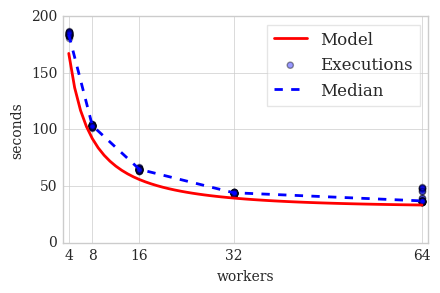

Prediction of the Wikipedia application target execution duration.


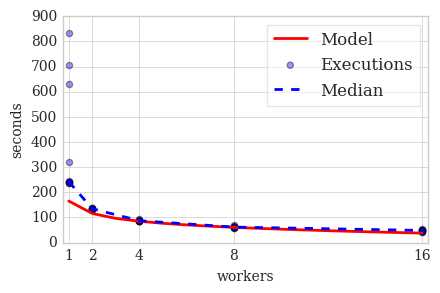

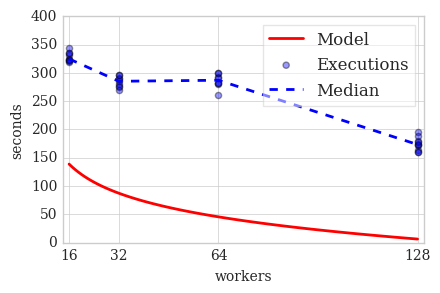

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


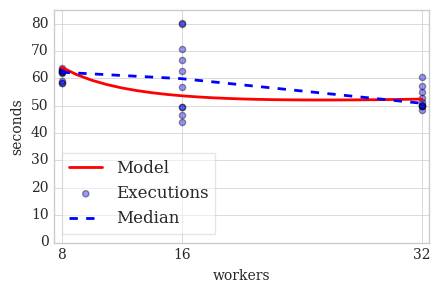

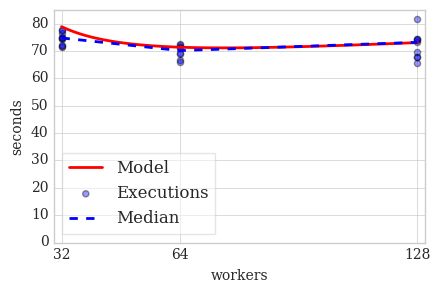

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.
CPU times: user 8.48 s, sys: 1.64 s, total: 10.1 s
Wall time: 8.21 s


In [14]:
%%time
from sklearn.linear_model import RidgeCV

model = find_model(['input * 1/workers', '(log(input))^2', '(log(workers))^2'], RidgeCV)
model_info(model)
plot_model(model)
to_compare.append(model)

#### Best by metric

Best in "MAPE rank": 950
Best in "RMSE rank": 950
Best in "rank sum": 950
Best in "homog": 375941
Best in "MAPE mean": 601
Best in "MAPE max": 3505
Best in "MAPE 2nd max": 679

Model 950 is the best in 3 metric(s):
      model number: 950
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: input * 1/workers, (log(input))^2, (log(workers))^2


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
2850,hbkmeans,-0.02,0.08,7215.48,950,55,91,146
2851,hbsort,0.45,0.45,173514.16,950,2007,1874,3881
2852,wikipedia,0.04,0.05,4690.61,950,465,802,1267


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,950,2527,2767,5294,0.40,0.19,0.45,0.08


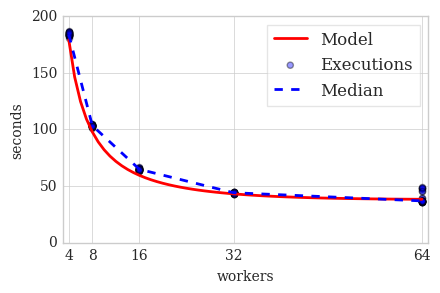

Prediction of the Wikipedia application target execution duration.


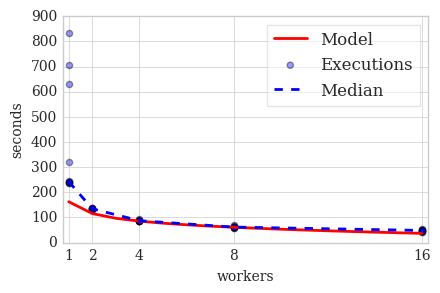

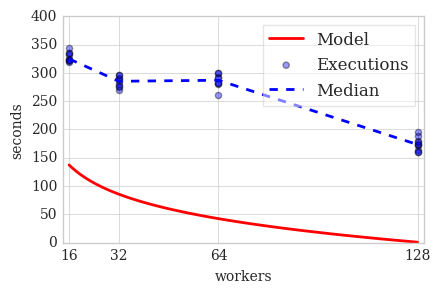

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


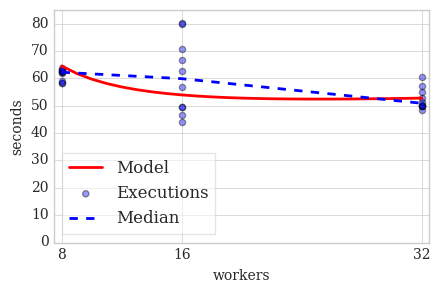

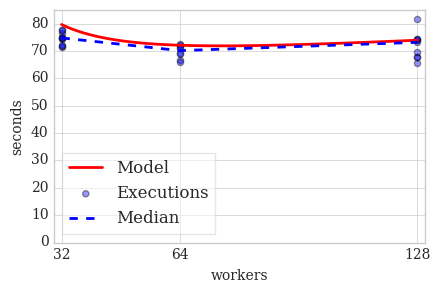

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.

Model 601 is the best in 1 metric(s):
      model number: 601
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: log(input/workers), input * 1/workers, (log(workers))^2


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
1803,hbkmeans,-0.06,0.11,8755.30,601,775,720,1495
1804,hbsort,0.30,0.33,147368.54,601,444,600,1044
1805,wikipedia,0.08,0.12,8995.36,601,4091,6081,10172


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,601,5310,7401,12711,0.22,0.19,0.33,0.12


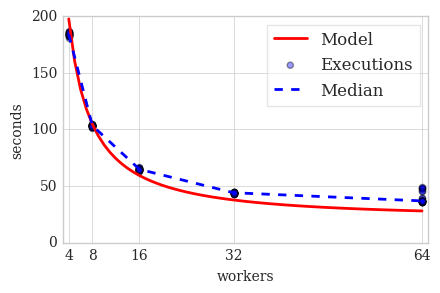

Prediction of the Wikipedia application target execution duration.


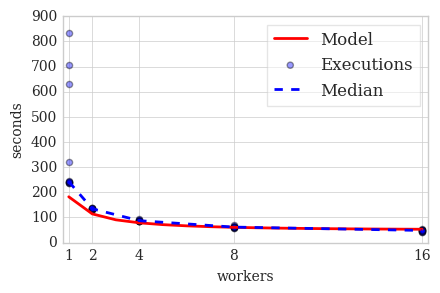

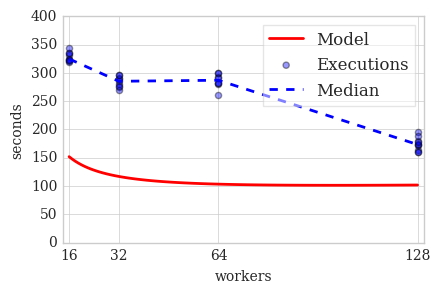

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


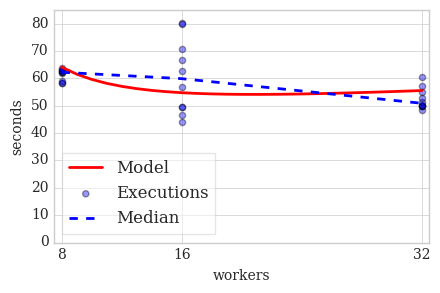

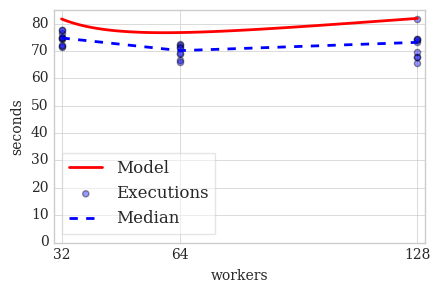

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.

Model 679 is the best in 1 metric(s):
      model number: 679
      linear model: LinReg
      duration log: False
            params: 
number of features: 3
          features: log(input), input * 1/workers, (log(workers))^2


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
2037,hbkmeans,-0.01,0.07,7125.34,679,15,76,91
2038,hbsort,0.46,0.47,177351.79,679,2336,2399,4735
2039,wikipedia,0.03,0.05,4058.47,679,376,606,982


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,679,2727,3081,5808,0.42,0.20,0.47,0.07


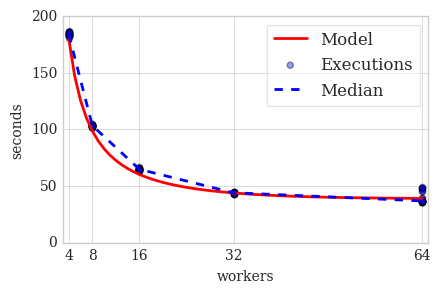

Prediction of the Wikipedia application target execution duration.


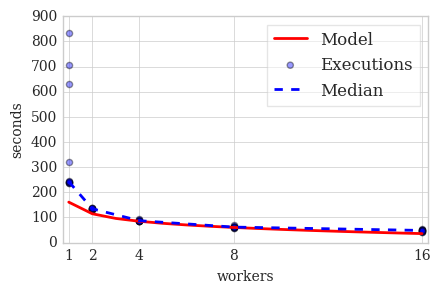

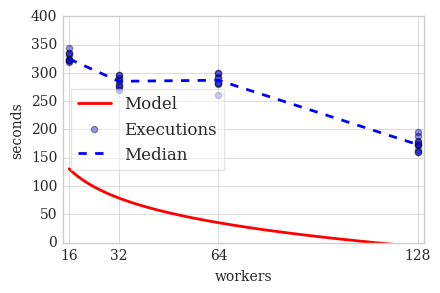

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


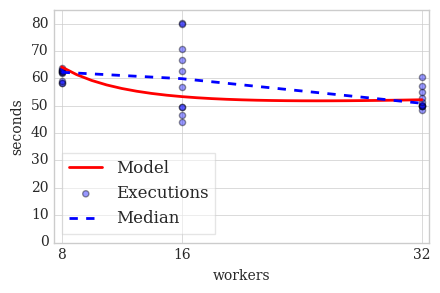

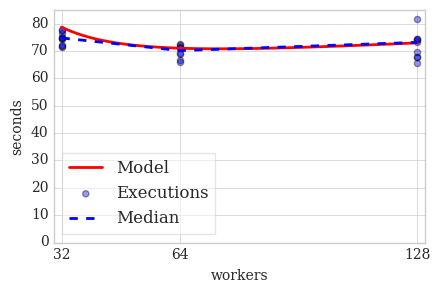

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.

Model 375941 is the best in 1 metric(s):
      model number: 375941
      linear model: RidgeCV
      duration log: False
            params: alphas: (0.01, 0.1, 1, 3, 10)
number of features: 9
          features: workers, input, log(input/workers), log(workers), input * 1/workers, input * log(workers), (1/workers)^2, (log(input/workers))^2, (log(workers))^2


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
1127823,hbkmeans,-1.69,1.69,151307.35,375941,43198,38430,81628
1127824,hbsort,1.69,1.69,557606.09,375941,29999,29937,59936
1127825,wikipedia,-1.69,1.69,116324.42,375941,33212,32545,65757


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,375941,106409,100912,207321,0.01,1.69,1.69,1.69


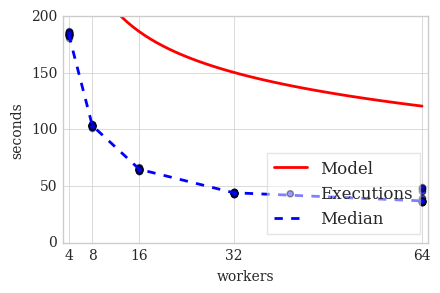

Prediction of the Wikipedia application target execution duration.


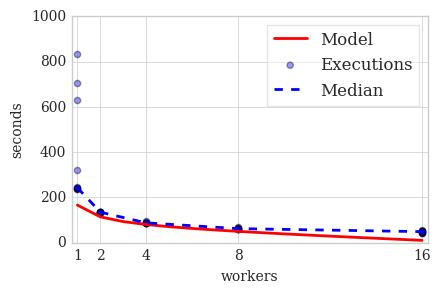

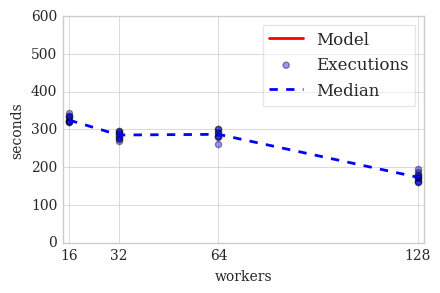

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


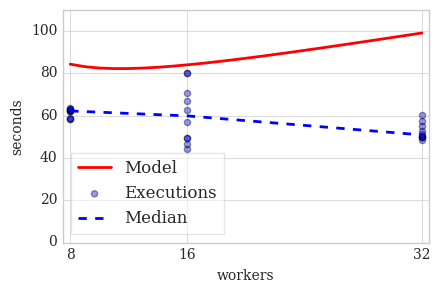

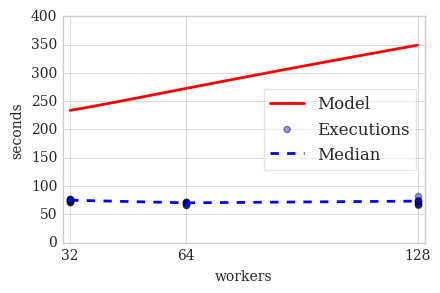

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.

Model 3505 is the best in 1 metric(s):
      model number: 3505
      linear model: LinReg
      duration log: False
            params: 
number of features: 4
          features: log(workers), input * 1/workers, (1/workers)^2, log(input) * log(workers)


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
10515,hbkmeans,-0.09,0.13,9325.08,3505,1206,944,2150
10516,hbsort,0.27,0.28,136380.97,3505,288,434,722
10517,wikipedia,0.20,0.20,19252.99,3505,10366,12617,22983


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,3505,11860,13995,25855,0.16,0.20,0.28,0.20


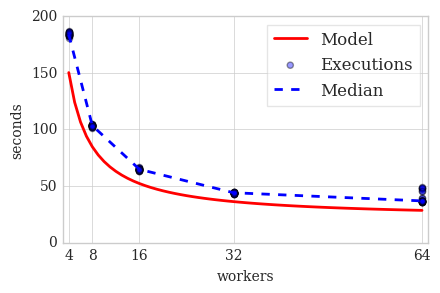

Prediction of the Wikipedia application target execution duration.


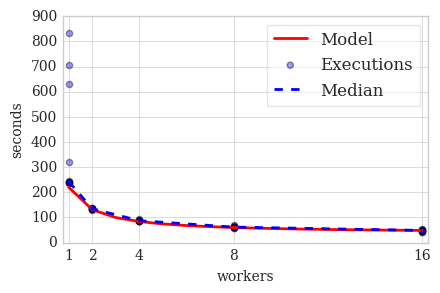

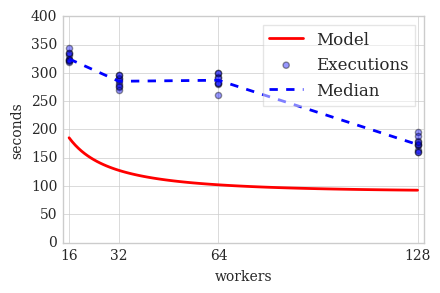

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


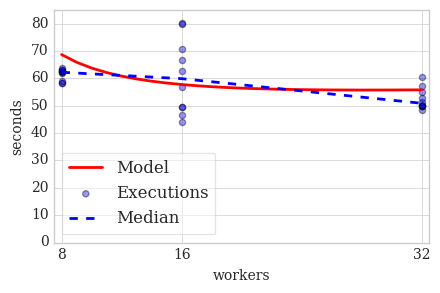

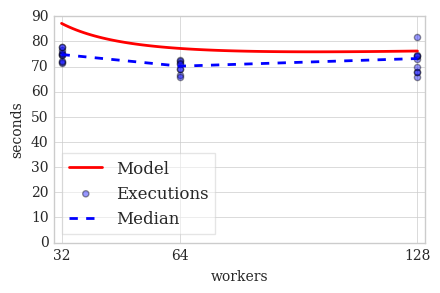

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [15]:
select_best(to_compare, cmp_df, model_info)

#### Comparison

In [16]:
display(cmp_df.loc[[m.number for m in to_compare]])
for model in to_compare:
    display(eval_df[eval_df.model == model.number])

,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
model,,,,,,,
263096,5895,10674,16569,0.37,0.21,0.44,0.12
950,2527,2767,5294,0.40,0.19,0.45,0.08
601,5310,7401,12711,0.22,0.19,0.33,0.12
679,2727,3081,5808,0.42,0.20,0.47,0.07
375941,106409,100912,207321,0.01,1.69,1.69,1.69
3505,11860,13995,25855,0.16,0.20,0.28,0.20


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
789288,hbkmeans,-0.01,0.07,7089.57,263096,17,74,91
789289,hbsort,0.44,0.44,171565.75,263096,1837,1754,3591
789290,wikipedia,0.12,0.12,10802.50,263096,4041,8846,12887


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
2850,hbkmeans,-0.02,0.08,7215.48,950,55,91,146
2851,hbsort,0.45,0.45,173514.16,950,2007,1874,3881
2852,wikipedia,0.04,0.05,4690.61,950,465,802,1267


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
1803,hbkmeans,-0.06,0.11,8755.30,601,775,720,1495
1804,hbsort,0.30,0.33,147368.54,601,444,600,1044
1805,wikipedia,0.08,0.12,8995.36,601,4091,6081,10172


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
2037,hbkmeans,-0.01,0.07,7125.34,679,15,76,91
2038,hbsort,0.46,0.47,177351.79,679,2336,2399,4735
2039,wikipedia,0.03,0.05,4058.47,679,376,606,982


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
1127823,hbkmeans,-1.69,1.69,151307.35,375941,43198,38430,81628
1127824,hbsort,1.69,1.69,557606.09,375941,29999,29937,59936
1127825,wikipedia,-1.69,1.69,116324.42,375941,33212,32545,65757


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
10515,hbkmeans,-0.09,0.13,9325.08,3505,1206,944,2150
10516,hbsort,0.27,0.28,136380.97,3505,288,434,722
10517,wikipedia,0.20,0.20,19252.99,3505,10366,12617,22983


## Log models

In [17]:
log_models = [m for m in get_model_creator().get_models(0, 1) if m.is_log]

In [18]:
cmp_df.loc[[m.number for m in log_models]].sort_values('rank sum')

,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
model,,,,,,,
262143,18285,26621,44906,0.25,0.32,0.42,0.38
524289,19932,27607,47539,0.27,0.33,0.44,0.38
262145,23164,25322,48486,0.37,0.35,0.55,0.31
524291,23320,25847,49167,0.37,0.35,0.55,0.32
262144,37521,38439,75960,0.12,0.65,0.70,0.67
524290,37623,38507,76130,0.10,0.65,0.70,0.67


      model number: 262145
      linear model: LinReg
      duration log: True
            params: 
number of features: 2
          features: log(input), log(workers)


,application,MPE,MAPE,RMSE,model,MAPE rank,RMSE rank,rank sum
786435,hbkmeans,0.18,0.18,13934.97,262145,2601,2550,5151
786436,hbsort,0.29,0.31,144016.03,262145,354,534,888
786437,wikipedia,0.55,0.55,72306.69,262145,20209,22238,42447


,model,MAPE rank,RMSE rank,rank sum,homog,MAPE mean,MAPE max,MAPE 2nd max
0,262145,23164,25322,48486,0.37,0.35,0.55,0.31


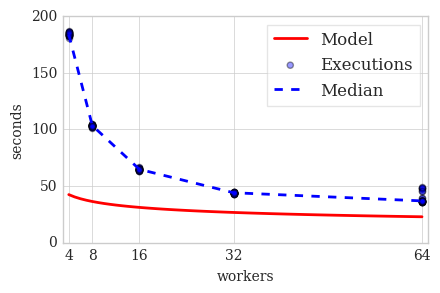

Prediction of the Wikipedia application target execution duration.


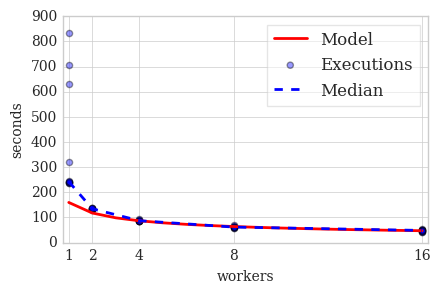

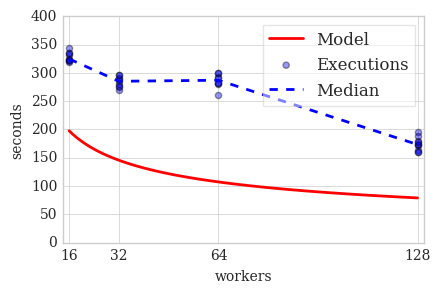

The top figure is the result of the HiBench Sort application with 3-GB input. The second figure uses 31-GB of data.


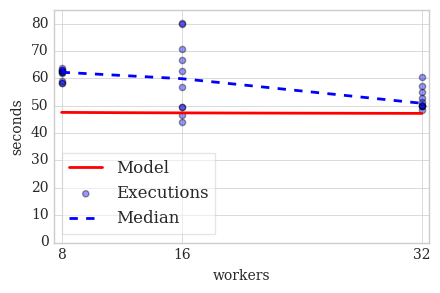

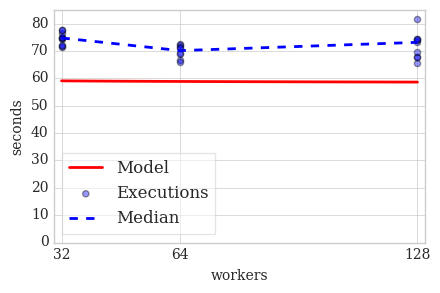

The top figure is the result of the HiBench K-means application with 16,384,000 samples. The second figure uses 65,536,000 samples.


In [19]:
model = model_info(262145)
plot_model(model)